In [ ]:
t-test разбор, когда и как правильно использовать

In [ ]:
### Этапы проверки статистических гипотез

1. Выдвижение основной гипотезы $( H_0 )$ и альтернативной гипотезы $( H_1 )$.
2. Выбор уровня значимости $( \alpha )$, на котором будет сделан вывод о справедливости гипотезы. Он равен вероятности допустить ошибку первого рода. Фиксация $(\beta )$ - вероятности ошибки второго рода.
3. Расчет необходимого размера выборки исходя из $\alpha$, $\beta$, дисперсии данных и величины ожидаемого эффекта ($\delta$).
4. Построение критической области.
5. Расчет статистики критерия.
7. По попаданию или непопаданию значения статистики в критическую область делается вывод об отвержении (или неотвержении) нулевой гипотезы на выбранном уровне значимости.

In [ ]:
### T-test

Рассматриваем пилотную выборку $ X = (X_1, X_2,...,X_n) $ и контрольную $ Y = (Y_1, Y_2,...,Y_m) $.


Нулевая гипотеза:
- $H_0: E(X) = E(Y)$

Альтернативная гипотеза:
- Двусторонняя: Средние значения двух групп не равны.
 - $ H_1 : E(X) \neq E(Y) $

- Левосторонняя: Среднее первой группы меньше среднего второй группы.
  - $ H_1 : E(X) < E(Y) $

- Правосторонняя: Среднее первой группы больше среднего второй группы.
  - $ H_1 : E(X) > E(Y) $

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from statsmodels.stats.weightstats import ztest
import warnings
import math
from scipy.stats import norm


warnings.filterwarnings('ignore')

alpha = 0.05

In [2]:
np.random.seed(23)
data_pilot = np.random.normal(loc=10, scale=1, size=1000)
data_control = np.random.normal(loc=10, scale=1, size=1000)

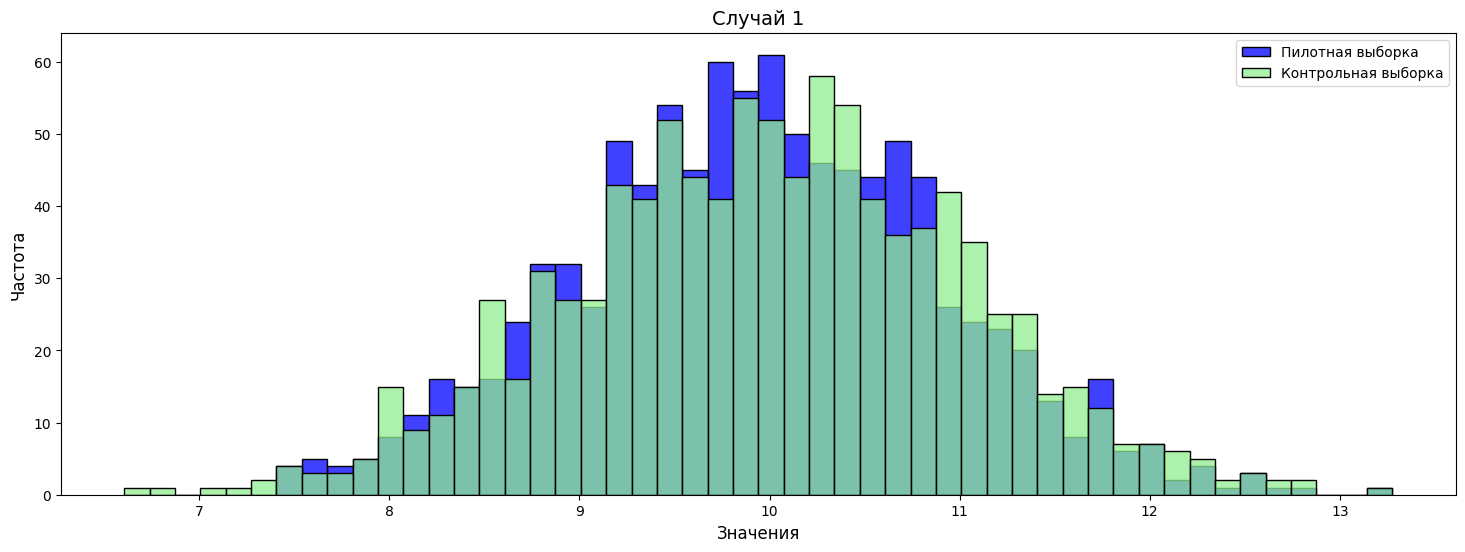

In [4]:
plt.figure(figsize=(18, 6))

all_samples = np.concatenate((data_pilot, data_control))
bins = np.histogram_bin_edges(all_samples, bins=50)

sns.histplot(data_pilot, color='blue', bins=bins, label='Пилотная выборка')
sns.histplot(data_control, color='lightgreen', bins=bins, label='Контрольная выборка')

plt.title('Случай 1', fontsize=14)
plt.xlabel('Значения', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.legend()
plt.show()

In [5]:
# расчет p-value
# Случай 1 (без значимого различия):
# t-статистика = -1.161, p-value = 0.246

t_stat1, p_value1 = stats.ttest_ind(data_pilot, data_control, equal_var=False, alternative='two-sided')
print("Случай 1 (без значимого различия):")
print(f"t-статистика = {t_stat1:.3f}, p-value = {p_value1:.3f}")

Случай 1 (без значимого различия):
t-статистика = -1.161, p-value = 0.246


In [6]:
np.random.seed(23)
data_pilot_new = np.random.normal(loc=9.92, scale=1, size=1000)

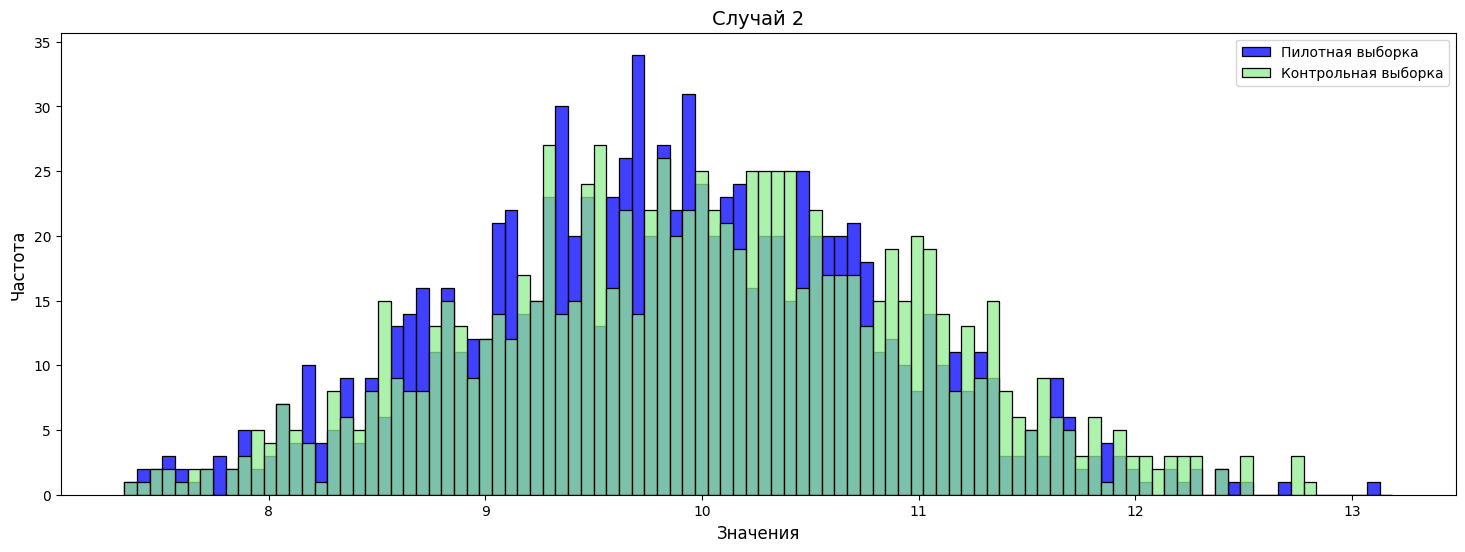

In [7]:
plt.figure(figsize=(18, 6))

all_samples = np.concatenate((data_pilot, data_pilot_new))
bins = np.histogram_bin_edges(all_samples, bins=100)

sns.histplot(data_pilot_new, color='blue', bins=bins, label='Пилотная выборка')
sns.histplot(data_control, color='lightgreen', bins=bins, label='Контрольная выборка')

plt.title('Случай 2', fontsize=14)
plt.xlabel('Значения', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.legend()
plt.show()

In [8]:
# t-статистика и p-value
t_stat2, p_value2 = stats.ttest_ind(data_pilot, data_pilot_new)
print("Случай 2 (значимое различие):")
print(f"t-статистика = {t_stat2:.3f}, p-value = {p_value2:.3f}")

Случай 2 (значимое различие):
t-статистика = 1.859, p-value = 0.063


In [ ]:
Проверяем статистическую корректность теста.
На основе исторических данных построим эмпирическую функцию распределения p-value при условии, что нулевая гипотеза верна. 
В этом случае эмпирическое распределение должно совпасть с равномерным
<!-- - эффект есть, нулевая гипотеза неверна: в этом случае распределение должно быть 
выпуклым вверх по отношению к равномерному распределению -->

Ниже показан случай, когда эмпирическое распределение РАВНОМЕРНО. 
То есть точки лежат вдоль линии, без разброса.

In [9]:
np.random.seed(42)

group_size = 1000
mu = 0
std = 1

values = np.random.normal(mu, std, group_size * 2)

def run_synthetic_experiments(values, group_size, effect=0, n_iter=1000):
    pvalues = []
    for _ in range(n_iter):
        a, b = np.random.choice(values, size=(2, group_size,), replace=True)
        pvalue = stats.ttest_ind(a, b).pvalue
        pvalues.append(pvalue)
    return np.array(pvalues)

pvalues_aa = run_synthetic_experiments(values=values, group_size=group_size)

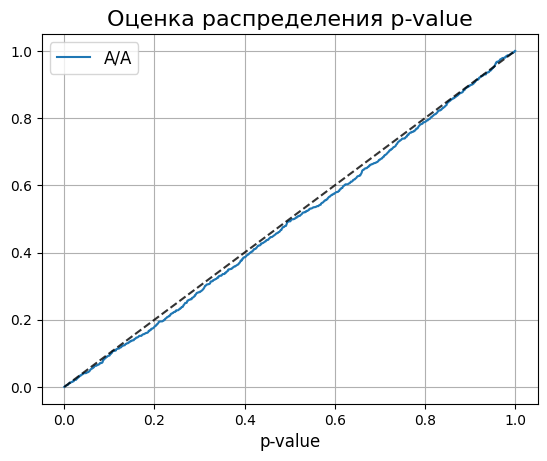

In [10]:
def plot_pvalue_distribution(pvalues_aa, alpha=0.05):
    """Рисует графики распределения p-value."""

    X = np.linspace(0, 1, 1000)
    Y_aa = [np.mean(pvalues_aa < x) for x in X]
    # Y_ab = [np.mean(pvalues_ab < x) for x in X]

    plt.plot(X, Y_aa, label='A/A')
    plt.plot([0, 1], [0, 1], '--k', alpha=0.8)

    plt.title('Оценка распределения p-value', size=16)
    plt.xlabel('p-value', size=12)
    plt.legend(fontsize=12)
    plt.grid()
    plt.show()

plot_pvalue_distribution(pvalues_aa)

In [ ]:

Посмотрим, что произойдет с эмпирическими распределениями, если добавить зависимость между данными. 
Теперь будем брать 3 совпадающих значения для каждого обЪекта.

Обратить внимание, что в этом случае эмпирическое распределение p-value неравномерное, 
а значит статистический тест работает НЕКОРРЕКТНО.


In [ ]:
Проверка корректности статистического теста
Ключевой метод валидации
•	Многократное проведение A/A-теста на исторических данных
•	Цель: проверить распределение p-значений
•	Корректный тест должен иметь равномерное распределение p-значений
Критерии корректности
•	При нулевой гипотезе эмпирическая функция распределения p-значений должна быть равномерной
•	На уровне значимости α (например, 0.1) эмпирическая функция также должна быть равна 0.1
•	Это гарантирует контроль вероятности ошибки первого рода


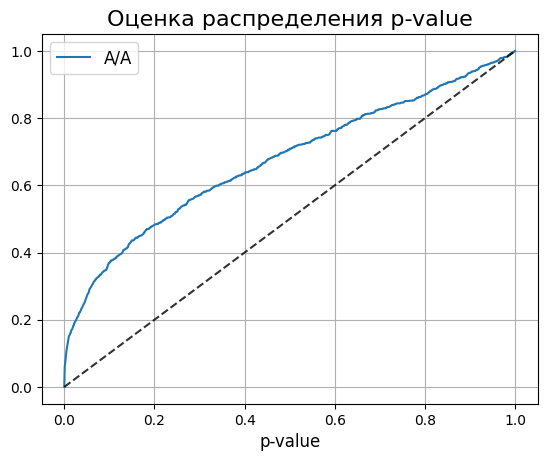

In [11]:
def run_synthetic_experiments_2(values, group_size, effect=0, n_iter=1000):
    pvalues = []
    for _ in range(n_iter):
        a, b = np.random.choice(values, size=(2, group_size,), replace=True)
        a = np.hstack((a, a, a))
        b = np.hstack((b, b, b))
        pvalue = stats.ttest_ind(a, b).pvalue
        pvalues.append(pvalue)
    return np.array(pvalues)

pvalues_aa = run_synthetic_experiments_2(values=values, group_size=group_size)
plot_pvalue_distribution(pvalues_aa)

In [ ]:
РАЗБОР заблуждений о t-test

In [ ]:
## КРАТКО Распространенные ошибки при применении t-теста
Проблема зависимых данных
•	Дублирование значений в группах искажает результаты
•	Может приводить к ложноположительным результатам
•	Увеличение вероятности ошибки первого рода в 6 и более раз
Типичные заблуждения
•	Некритичное сравнение p-значения с уровнем значимости
•	Применение теста к неподходящим данным
•	Отсутствие контроля за ошибками первого и второго рода
Практические рекомендации
•	Тщательно проверяйте независимость данных
•	Используйте A/A-тестирование для валидации методики
•	Критически оценивайте статистические результаты
•	Не спешите с выводами только на основании низкого p-значения



In [ ]:
МИФ: для использования t-теста требуется нормальное распределение данных

Реальные требования к t-тесту:
•	Независимость наблюдений внутри и между выборками
•	Специфические статистические свойства числителя и знаменателя: 
1.	Числитель: нормальное распределение с нулевым математическим ожиданием
2.	Знаменатель: распределение хи-квадрат с определенным числом степеней свободы
3.	Статистическая независимость числителя и знаменателя


In [12]:
# функция для расчета числителя и знаменителя
def calculate_t_statistics(distribution, sample_size, num_iters=10000, seed=2000):
    np.random.seed(seed)
    t_numerators = []
    t_denominators_func = []

    # генерация данных

    for i in range(num_iters):
        sample1 = distribution(size=sample_size)
        sample2 = distribution(size=sample_size)
        numerator = np.mean(sample1) - np.mean(sample2)

        var_1 = np.var(sample1, ddof=1)
        var_2 = np.var(sample2, ddof=1)

        var_p = ((sample_size - 1) * var_1 + (sample_size - 1) * var_2) / (2 * sample_size - 2)

        denominator_func = ((2 * sample_size - 2) * var_p / 1)

        t_numerators.append(numerator)
        t_denominators_func.append(denominator_func)

    return np.array(t_numerators), np.array(t_denominators_func)

In [13]:
# требования выполнены для норм распределения на небольшой выборке
sample_size = 100
t_numerators, t_denominators_func = calculate_t_statistics(np.random.normal, sample_size)

In [ ]:
Применим Шапиро-Уилка, проверяя подчиняется ли числитель нормальному распределению.

In [14]:
p_value_shapiro = stats.shapiro(t_numerators).pvalue
p_value_shapiro

np.float64(0.3667727570843489)

In [ ]:
Гипотезу о нормальности числителя не отвергаем.

Применим тест Колмогорова-Смирнова, чтобы проверить, подчиняется ли функция от знаменателя распределению 

In [15]:
degrees_of_freedom = 2 * sample_size - 2
p_value_kolmogorov = stats.kstest(t_denominators_func, 'chi2', args=(degrees_of_freedom,)).pvalue
p_value_kolmogorov

np.float64(0.5694447111559412)

In [ ]:
смотрим независимость числителя и знаменателя, посмотрим на корреляцию.

In [16]:
np.corrcoef(t_numerators, t_denominators_func)[0, 1]

np.float64(-0.003494284462488939)

In [ ]:
Вывод: корреляция между числителем и знаменателем отсутствует.

In [ ]:
В случае других распределений проверку корректности можно провести, например, с помощью AA-теста на исторических данных, где заведомо нет эффектов. 
В качестве примера рассмотрим экспоненциальное распределение.

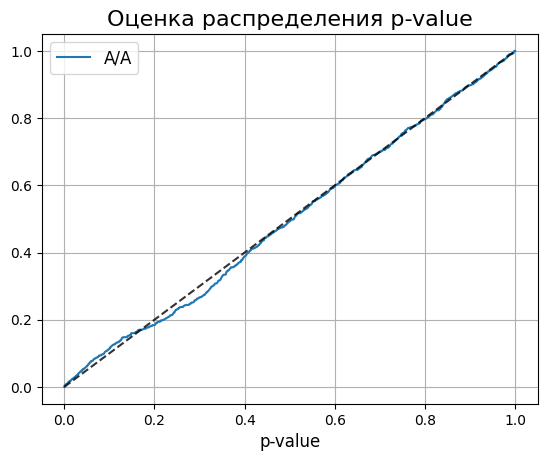

In [17]:
data_exp = np.random.binomial(50, 0.5, size=50000 * 2)
pvalues_aa_exp = run_synthetic_experiments(values=data_exp, group_size=50000)
plot_pvalue_distribution(pvalues_aa_exp)

In [ ]:
Тест корректен, эмпирическое распределение p-value соответствует теоретическому.

In [ ]:
МИФ: t-тест не чувствителен к аномалиям.
---------------------------------------
Реальные требования к t-тесту:

Влияние выбросов на результаты
	Выбросы могут радикально изменить результаты t-теста
	Различные сценарии влияния выбросов: 
  1.	Одностороннее смещение выбросов
  2.	Симметричные выбросы
  3.	Асимметричные выбросы

	Влияние зависит от: 
   o	Количества выбросов
   o	Направления выбросов
   o	Соотношения числителя и знаменателя в статистике


In [ ]:
Проведем моделирование для случаев, когда математические ожидания пилотной и контрольной выборки равны.

Рассмотрим 3 случая:
- выбросов в пилотной группе нет
- выбросы в пилотной группе положительны
- выбросы в пилотной группе как положительны, так и отрицательны

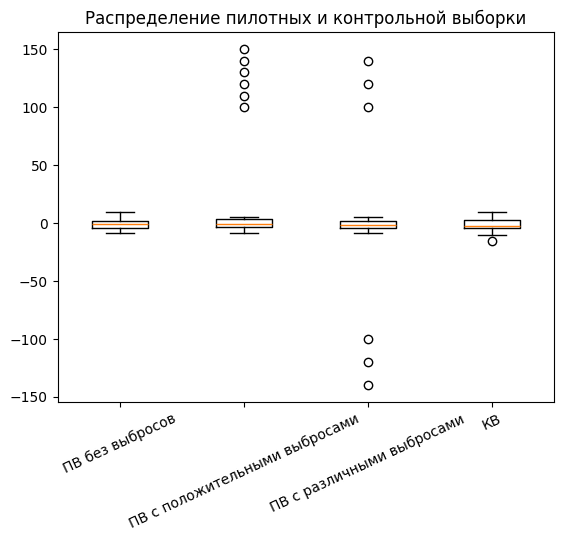

In [18]:
np.random.seed(2008)

group_size = 30
outliers_number = 6

data_pilot = np.random.normal(loc=0, scale=5, size=group_size-outliers_number)
data_control = np.random.normal(loc=0, scale=5, size=group_size)

data_pilot_no_outliers = np.append(data_pilot, np.random.normal(loc=0, scale=5, size=group_size-outliers_number))
data_pilot_positive_outliers = np.append(data_pilot, [100, 110, 120, 130, 140, 150])
data_pilot_all_outliers = np.append(data_pilot, [100, 120, 140, -100, -120, -140])

# Визуализация групп 
# (ПВ - пилотная выборка, КВ - контрольная выборка)

plt.boxplot([data_pilot_no_outliers, data_pilot_positive_outliers, data_pilot_all_outliers, data_control],
            labels=['ПВ без выбросов', 'ПВ c положительными выбросами', 'ПВ с различными выбросами', 'КВ'])
plt.title("Распределение пилотных и контрольной выборки")
plt.xticks(rotation=25)
plt.show()


In [ ]:
Посмотрим на значения t-статистики и p-value в данных без аномальных значений
Посмотрим на значения t-статистики и p-value в данных с аномальными положительными значениями
Посмотрим на значения t-статистики и p-value в данных с аномальными симметричными значениями

In [24]:
t_stat_clean, p_value_clean = stats.ttest_ind(data_pilot, data_control)
print(f"T-статистика без выбросов: {t_stat_clean}, p-value: {p_value_clean}")

t_stat_positive_outliers, p_value_positive_outliers = stats.ttest_ind(data_pilot_positive_outliers, data_control)
print(f"T-статистика с положительными выбросами: {t_stat_positive_outliers}, p-value: {p_value_positive_outliers}")

t_stat_all_outliers, p_value_all_outliers = stats.ttest_ind(data_pilot_all_outliers, data_control)
print(f"T-статистика с симметричными выбросами: {t_stat_all_outliers}, p-value: {p_value_all_outliers}")



T-статистика без выбросов: -0.5759469014899252, p-value: 0.5671355124734674
T-статистика с положительными выбросами: 2.565367499161219, p-value: 0.012914720710225433
T-статистика с симметричными выбросами: -0.03967111873039319, p-value: 0.9684915690356939


In [ ]:
Сгенерируем данные, чтобы посмотреть как t-статистика и p-value изменяются в зависимости от количества выбросов.

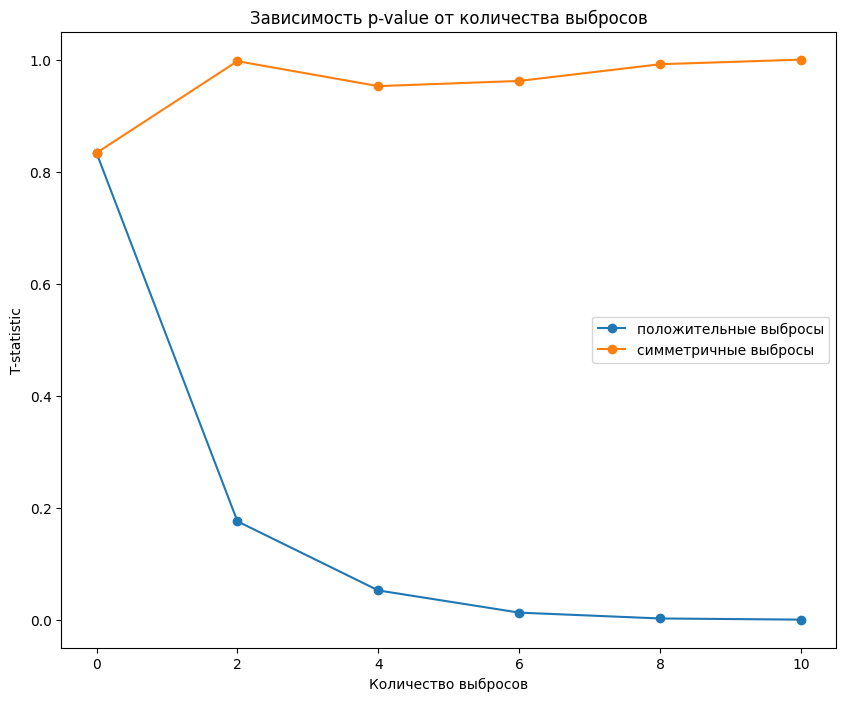

In [35]:
np.random.seed(2003)

max_outliers = 10

pos_outliers = [100] * max_outliers
symm_outliers = [100, -100] * (max_outliers // 2)

p_values_pos_outliers = []
p_values_symm_outliers = []

outliers_number_list = list(range(0, max_outliers+1, 2))
for outliers_number in outliers_number_list:
    # добавляем выбросы
    data_pilot_pos_outliers_cur = np.append(data_pilot_no_outliers[:group_size-outliers_number], pos_outliers[:outliers_number])
    data_pilot_symm_outliers_cur = np.append(data_pilot_no_outliers[:group_size-outliers_number], symm_outliers[:outliers_number])

    p_value_pos_outliers = stats.ttest_ind(data_pilot_pos_outliers_cur, data_control).pvalue
    p_value_symm_outliers = stats.ttest_ind(data_pilot_symm_outliers_cur, data_control).pvalue

    p_values_pos_outliers.append(p_value_pos_outliers)
    p_values_symm_outliers.append(p_value_symm_outliers)

plt.figure(figsize=(10, 8))
# plt.subplot(2, 2, 1)
plt.plot(outliers_number_list, p_values_pos_outliers, marker='o', label='положительные выбросы')
plt.title('Зависимость p-value от количества выбросов')
plt.xlabel('Количество выбросов')
plt.ylabel('T-statistic')

# plt.subplot(2, 2, 2)
plt.plot(outliers_number_list, p_values_symm_outliers, marker='o', label='симметричные выбросы')
plt.legend(loc = 'right')
plt.show()

In [ ]:
Миф: Тест применим только для малых или больших выборок.
    -----------------------------
Реальные требования к t-тесту:
Универсальность t-теста
•	Работает для выборок различного размера
•	При стремлении размера выборки к бесконечности сходится к Z-тесту
•	Эффективен для разных распределений: 
        o	Нормальное распределение
        o	Равномерное распределение
        o	Экспоненциальное распределение
        o	Логнормальное распределение

Практические рекомендации
•	Проверять работу теста на конкретных данных
•	Контролировать вероятность ошибок первого и второго рода
•	Проводить многократные A/A-тесты


In [ ]:
Построим график эмпирического распределения p-value. В случае истинности нулевой гипотезы: он должен сойтись с теоретическим, т.е. получиться равномерным.

Рассмотрим различные размеры выборок:
- 30
- 3000
- 300000

Проведем 1000 тестов
lognormal работает иначе.    

In [48]:
np.random.seed(42)

loc=0
scale=1
sigma=10

# data_30 = np.random.normal(loc=loc, scale=scale, size=30 * 2)
# data_300 = np.random.normal(loc=loc, scale=scale, size=300 * 2)
# data_30000 = np.random.normal(loc=loc, scale=scale, size=30000 * 2)

# data_30 = np.random.uniform(size=30 * 2)
# data_300 = np.random.uniform(size=300 * 2)
# data_30000 = np.random.uniform(size=30000 * 2)

data_30 = np.random.exponential(scale=scale, size=30 * 2)
data_300 = np.random.exponential(scale=scale, size=300 * 2)
data_30000 = np.random.exponential(scale=scale, size=30000 * 2)

# data_30 = np.random.lognormal(sigma=sigma, size=30 * 2)
# data_300 = np.random.lognormal(sigma=sigma, size=300 * 2)
# data_30000 = np.random.lognormal(sigma=sigma, size=30000 * 2)

In [49]:
pvalues_aa_30 = run_synthetic_experiments(values=data_30, group_size=30)
pvalues_aa_300 = run_synthetic_experiments(values=data_300, group_size=300)
pvalues_aa_30000 = run_synthetic_experiments(values=data_30000, group_size=30000)

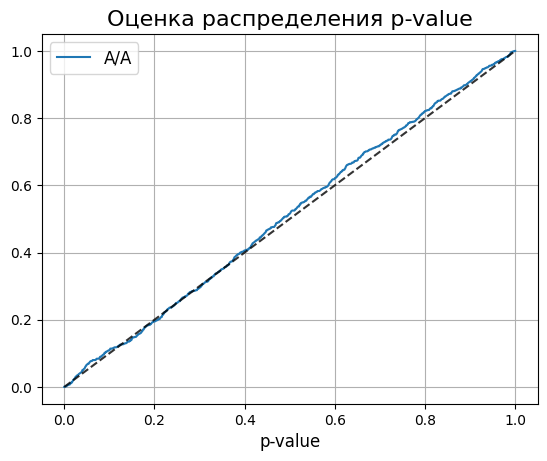

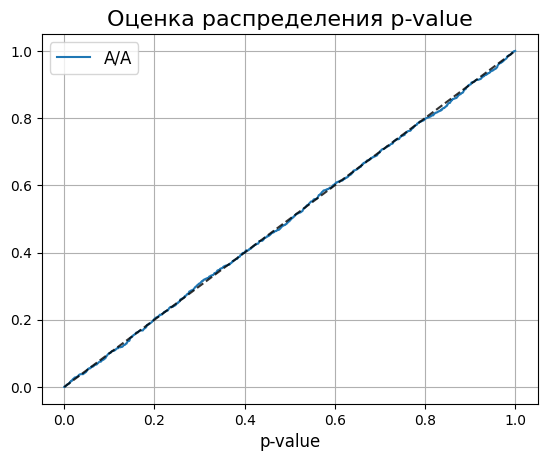

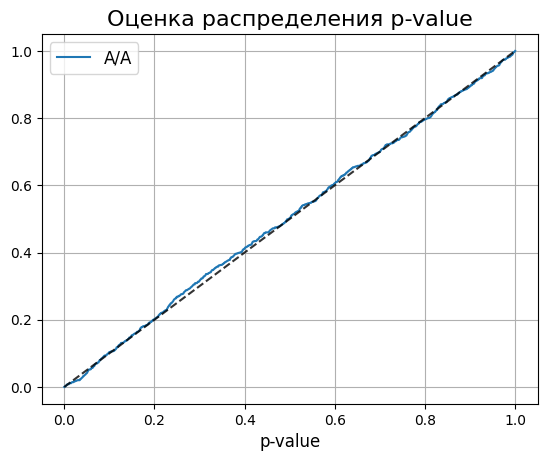

In [50]:
for pvalues in [pvalues_aa_30, pvalues_aa_300, pvalues_aa_30000]:
    plot_pvalue_distribution(pvalues)

In [ ]:
Как мы видим, как для малых, так и для больших выборок распределение p-value равномерно
Более того, на самом деле, для больших выборок t-test по сути становится эквивалентен z-test'у. Продемонстрируем это.

In [51]:
np.random.seed(200)

large_pilot_group = np.random.normal(loc=100, scale=15, size=10000)
large_control_group = np.random.normal(loc=100, scale=15, size=10000)

In [53]:
pop_mean = 100
pop_std = 15

# t-тест для большой выборки
t_stat_large, p_value_large = stats.ttest_ind(large_pilot_group, large_control_group)

# z-тест для большой выборки
z_stat_large, p_value_z_large = ztest(large_pilot_group, large_control_group)

# Посмотрим на результаты для большой выборки
print("\nБольшая выборка:")
print(f"t-тест: t-статистика = {t_stat_large}, p-value = {p_value_large}")
print(f"z-тест: z-статистика = {z_stat_large}, p-value = {p_value_z_large}")


Большая выборка:
t-тест: t-статистика = -1.410701605417186, p-value = 0.15834817226993442
z-тест: z-статистика = -1.410701605417186, p-value = 0.1583326174133749


In [ ]:
Нулевое распределение в t-test стремится к нулевому распределению в z-test, а именно $St(\nu)$ $\rightarrow$ $N(0, 1)$, $n\rightarrow\infty$

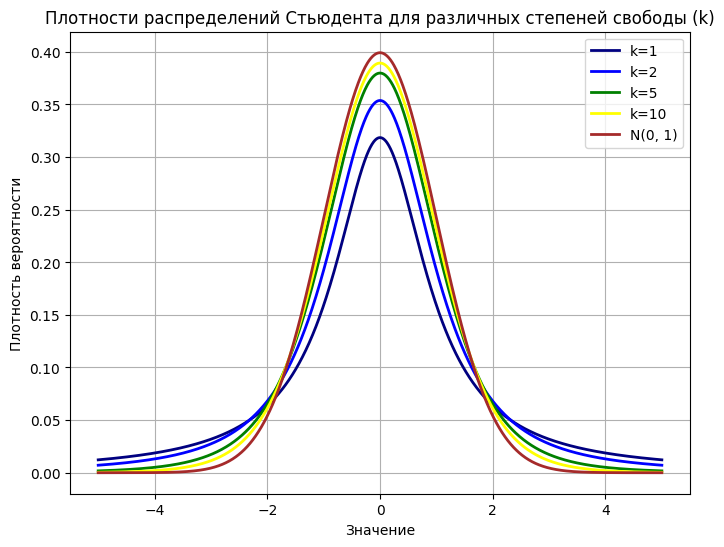

In [54]:
k_values = [1, 2, 5, 10, 10000]
plt.figure(figsize=(8, 6))
x_vals = np.linspace(-5, 5, 1000)
colors = ['navy', 'blue', 'green', 'yellow', 'brown']

for i, k in enumerate(k_values):
    if k == 10000:
        plt.plot(x_vals, stats.norm.pdf(x_vals), label=f'N(0, 1)', color=colors[i], lw=2)
    else:
        plt.plot(x_vals, stats.t.pdf(x_vals, df=k), label=f'k={k}', color=colors[i], lw=2)

plt.title('Плотности распределений Стьюдента для различных степеней свободы (k)')
plt.xlabel('Значение')
plt.ylabel('Плотность вероятности')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [ ]:
Миф: p-value указывает на вероятность истинности нулевой гипотезы.
    -----------------------------
Реальность:
          Из определения p-value видно, что оно не дает прямой информации о вероятности истинности или ложности нулевой гипотезы.

Напомним, что p-value - это вероятность получить значение статистики как в эксперименте или более экстремальное при условии того, что нулевая гипотеза верна.

$$ p_{value} = \mathbb{P}(|T| > t|H_0) $$


И как мы увидим ниже, при истинности нулевой гипотезы p-value может равновероятно принимать значения от 0 до 1, так что сделать вывод об истинности нулевой гипотезы только на основе значения p-value мы не можем.


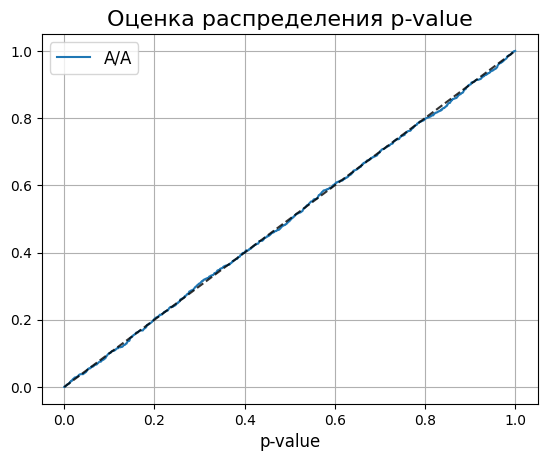

In [55]:
plot_pvalue_distribution(pvalues_aa_300)

In [ ]:
Миф: Если p-value больше уровня значимости, то сравниваемые группы полностью идентичны.
    -----------------------------
Реальность:
p-value больше уровня значимости может означать, что у нас недостаточно данных, чтобы сделать вывод о значимой разнице. Группы все еще могут различаться, но тест не смог обнаружить это.


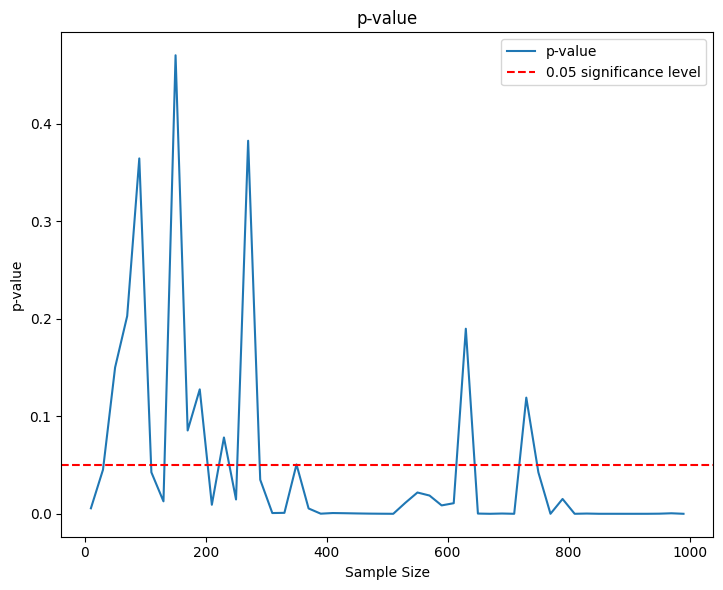

In [56]:
# Рассмотрим случай, когда эффект очень маленький. Мы будем увеличивать размер выборок и смотреть на p-value
np.random.seed(42)

mu = 0
scale = 1
effect = 0.2
pvalues = []
sample_sizes = list(range(10, 1010, 20))
for group_size in sample_sizes:
    pvalues_group_size = []
    pilot_group = np.random.normal(loc=mu, scale=scale, size=group_size)
    control_group = np.random.normal(loc=mu+effect, scale=scale, size=group_size)
    pvalue = stats.ttest_ind(pilot_group, control_group).pvalue

    pvalue_selected_mean = np.mean(pvalue)

    pvalues.append(pvalue_selected_mean)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(sample_sizes, pvalues, label='p-value')
plt.axhline(y=0.05, color='r', linestyle='--', label='0.05 significance level')
plt.xlabel('Sample Size')
plt.ylabel('p-value')
plt.title('p-value')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
Видим, что p-value очень волатильно. Это связано с высокой ошибкой 2 рода, поэтому давайте каждый срез усредним на основе 100 значений p-value.

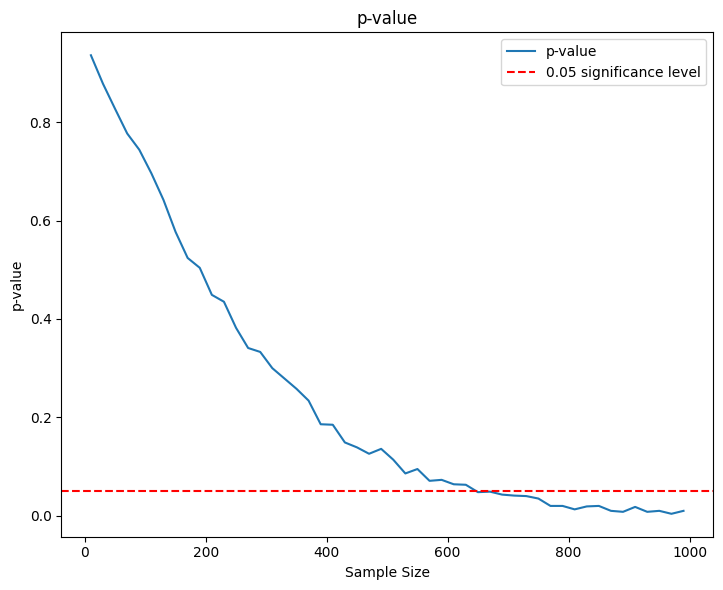

In [57]:
np.random.seed(23)

mu = 0
scale = 1
effect = 0.2
pvalues = []
sample_sizes = list(range(10, 1010, 20))
for sample_size in sample_sizes:
    pvalues_group_size = []
    for _ in range(1000):
        pilot_group = np.random.normal(loc=mu, scale=scale, size=sample_size)
        control_group = np.random.normal(loc=mu+effect, scale=scale, size=sample_size)
        pvalue = stats.ttest_ind(pilot_group, control_group).pvalue
        pvalues_group_size.append(pvalue > alpha)

    pvalue_selected_mean = np.mean(pvalues_group_size)

    pvalues.append(pvalue_selected_mean)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(sample_sizes, pvalues, label='p-value')
plt.axhline(y=0.05, color='r', linestyle='--', label='0.05 significance level')
plt.xlabel('Sample Size')
plt.ylabel('p-value')
plt.title('p-value')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
Получили, что при размере группы около 650, p-value принимает значение 0.05.  
Сверим результат с теорией, зафиксировав $\alpha$ на уровне 0.05, а $\beta$ на уровне 0.05.


In [58]:
def calculate_sample_size(alpha, beta, var_x, var_y, eff):

    PHI_alpha = norm.ppf(1 - alpha / 2)
    PHI_beta = norm.ppf(1 - beta)

    n = (PHI_alpha + PHI_beta) ** 2 * (var_x + var_y) / eff ** 2

    return math.ceil(n)
print(calculate_sample_size(alpha=0.05, beta=0.05, var_x=1, var_y=1, eff=0.2))

650


In [ ]:
Как и ожидалось, значение размера выборки, рассчитанное теоретически, совпадает со значением, полученным на практике.

In [ ]:
МИФ: 95% доверительный интервал показывает, что с вероятностью 0.95 истинный параметр лежит в этом интервале.
-----------
Реальность:
На самом деле доверительный интервал интерпретируется следующим образом: если бы мы провели бесконечное число экспериментов и для каждого вычислили 95%-ный доверительный интервал, то в 95% случаев этот интервал содержал бы истинное значение параметра. Мы не можем утверждать с 95%-ной вероятностью, что конкретный интервал содержит истинное значение параметра, так как параметр либо лежит в интервале, либо не лежит там.

In [ ]:
Проведем моделирование для малой выборки размером 30 и большой выборки размером 3000

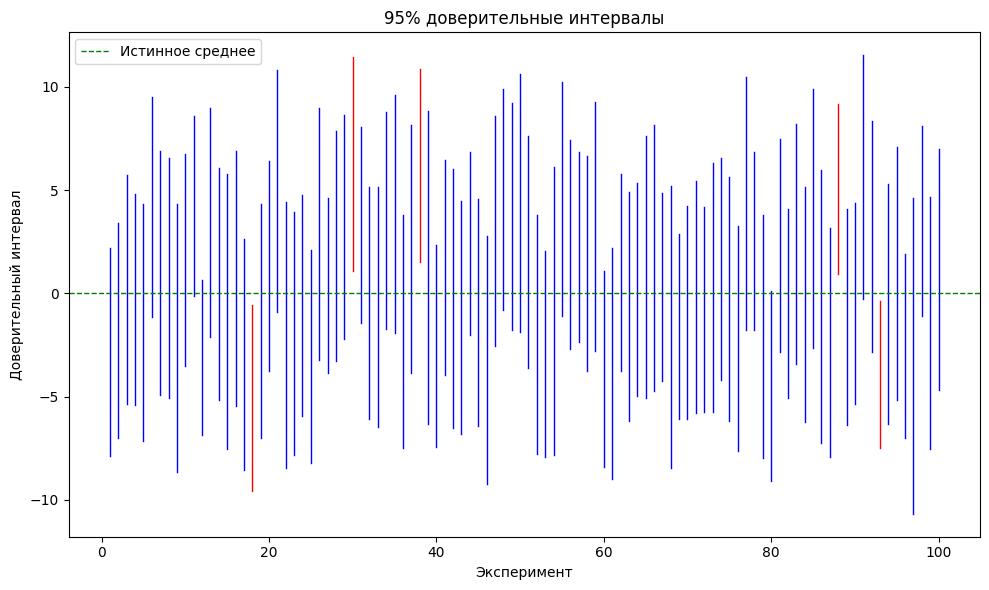

In [63]:
def make_ci_simulations(sample_size=30, num_simulations=100, true_mean=0, pop_std=15, seed=42):
    np.random.seed(42)
    confidence_intervals = []
    contains_true_mean = []
    for _ in range(num_simulations):
        sample = np.random.normal(loc=true_mean, scale=pop_std, size=sample_size)
        ci_low, ci_high = stats.t.interval(0.95, len(sample)-1, loc=np.mean(sample), scale=stats.sem(sample))
        confidence_intervals.append((ci_low, ci_high))

        contains_true_mean.append(ci_low <= true_mean <= ci_high)
    return confidence_intervals, contains_true_mean

def plot_ci(confidence_intervals, contains_true_mean, true_mean):
    plt.figure(figsize=(10, 6))

    for i, (ci, contains_true_mean) in enumerate(zip(confidence_intervals, contains_true_mean)):
        if contains_true_mean:
            plt.plot([i+1, i+1], [ci[0], ci[1]], color='blue', lw=1)
        else:
            plt.plot([i+1, i+1], [ci[0], ci[1]], color='red', lw=1)
    plt.axhline(y=true_mean, color='green', linestyle='--', label='Истинное среднее', lw=1)

    plt.title("95% доверительные интервалы")
    plt.xlabel("Эксперимент")
    plt.ylabel("Доверительный интервал")
    plt.legend()
    plt.tight_layout()
    plt.show()

# **Зафиксируем параметры эксперимента**
true_mean = 0
pop_std = 15
num_simulations = 100
confidence_level = 0.95

sample_size=30


confidence_intervals_30, contains_true_mean_30 = make_ci_simulations(
    sample_size=sample_size,
    num_simulations=num_simulations,
    true_mean=true_mean,
    pop_std=pop_std
)
# Построим доверительные интервалы.
plot_ci(confidence_intervals_30, contains_true_mean_30, true_mean)

In [ ]:
### Выборка размером 3000

In [64]:
sample_size=3000

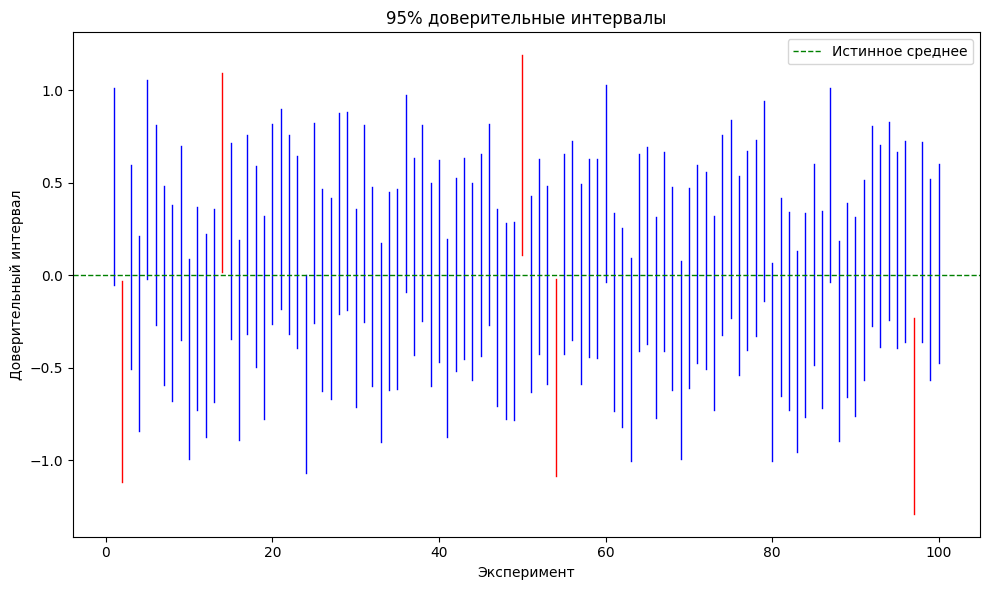

In [65]:
confidence_intervals_3000, contains_true_mean_3000 = make_ci_simulations(
    sample_size=sample_size,
    num_simulations=num_simulations,
    true_mean=true_mean,
    pop_std=pop_std
)

#Построим доверительные интервалы. и получим схожие результаты для выборок разных размеров
plot_ci(confidence_intervals_3000, contains_true_mean_3000, true_mean)